# Covid 19 Exploratory Data Analysis Project

Dataset - https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
init_notebook_mode(connected=True)

In [4]:
data = pd.read_csv('data/covid_19_data.csv')
data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [5]:
data = data.rename(columns={'Country/Region':'Country',
                            'Province/State':'State', 
                            'ObservationDate':'Date'})

In [6]:
data = data.drop('SNo', axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         306429 non-null  object 
 1   State        228329 non-null  object 
 2   Country      306429 non-null  object 
 3   Last Update  306429 non-null  object 
 4   Confirmed    306429 non-null  float64
 5   Deaths       306429 non-null  float64
 6   Recovered    306429 non-null  float64
dtypes: float64(3), object(4)
memory usage: 16.4+ MB


In [8]:
data.describe()

,Confirmed,Deaths,Recovered
count,3.064290e+05,306429.000000,3.064290e+05
mean,8.567091e+04,2036.403268,5.042029e+04
std,2.775516e+05,6410.938048,2.015124e+05
min,-3.028440e+05,-178.000000,-8.544050e+05
25%,1.042000e+03,13.000000,1.100000e+01
50%,1.037500e+04,192.000000,1.751000e+03
75%,5.075200e+04,1322.000000,2.027000e+04
max,5.863138e+06,112385.000000,6.399531e+06


In [9]:
data.isnull().sum()

Date               0
State          78100
Country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [10]:
data.head()

,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [11]:
df_countries = data.groupby(['Country', 'Date']).sum().reset_index().sort_values('Date', ascending=False)
df_countries = df_countries.drop_duplicates(subset = ['Country'])
df_countries = df_countries[df_countries['Confirmed']>0]

In [12]:
fig = go.Figure(data=go.Choropleth(
    locations = df_countries['Country'],
    locationmode = 'country names',
    z = df_countries['Confirmed'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Confirmed Cases as of March 28, 2020',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

In [13]:
print('Total Confirmed Cases Worldwide')
data.Confirmed.sum()

Total Confirmed Cases Worldwide


26252051758.0

In [14]:
print('Total Confirmed Deaths Worldwide')
data.Deaths.sum()

Total Confirmed Deaths Worldwide


624013017.0

In [15]:
print('Total Confirmed Recoveries Worldwide')
data.Recovered.sum()

Total Confirmed Recoveries Worldwide


15450237912.0

In [16]:
print('Actively Infected During that Time')
data.Confirmed.sum() - data.Deaths.sum() - data.Recovered.sum()

Actively Infected During that Time


10177800829.0

In [17]:
df1 = data.sort_values('Recovered', ascending=False)

<AxesSubplot:title={'center':'Recoveries by Country'}, xlabel='Recovered', ylabel='Country'>

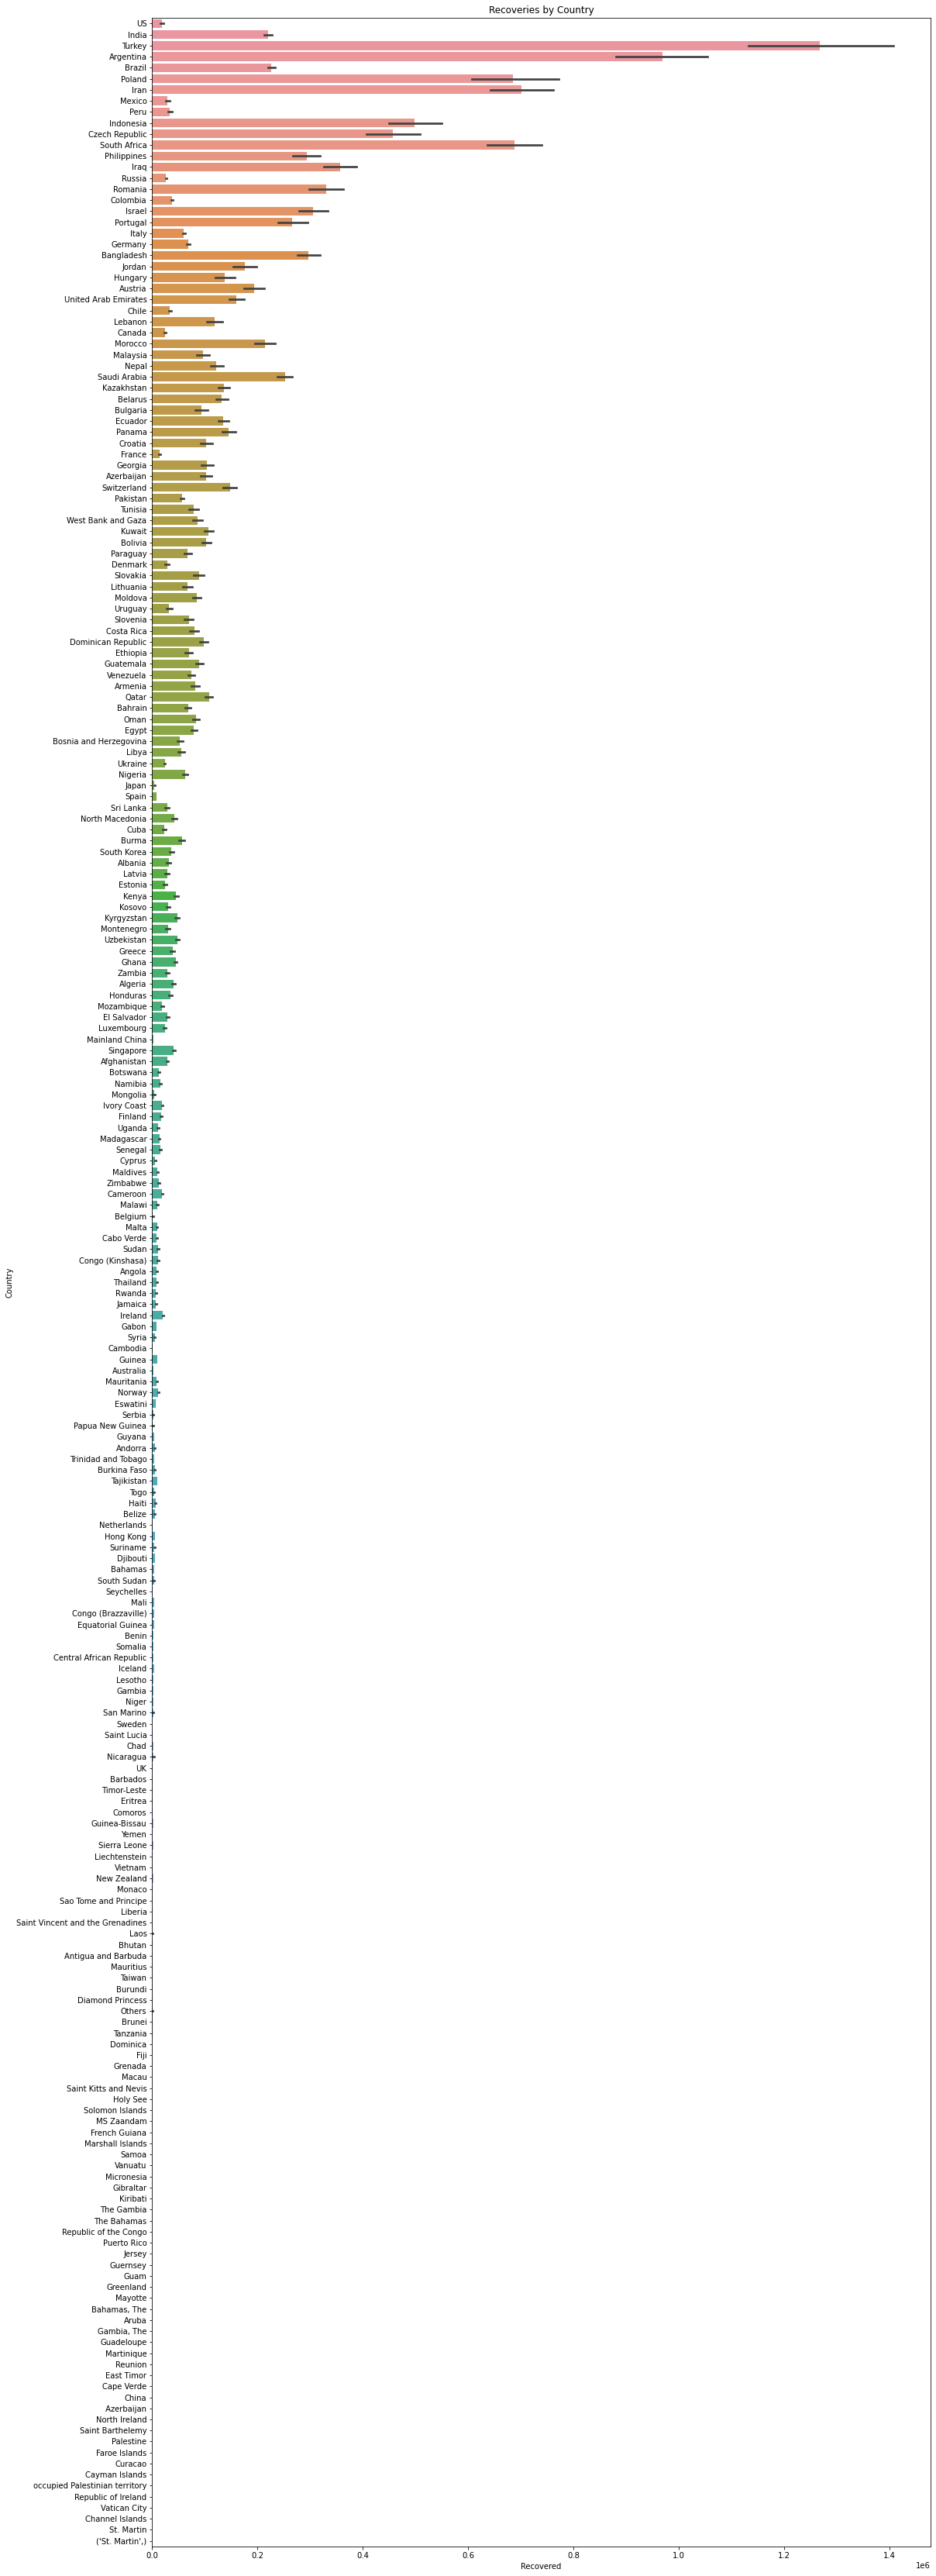

In [19]:
plt.figure(figsize=(18,60))
plt.title('Recoveries by Country')
sns.barplot(data=df1, y='Country', x='Recovered')

In [26]:
df2 = data.sort_values('Deaths', ascending=False)

<AxesSubplot:title={'center':'Deaths by Country'}, xlabel='Deaths', ylabel='Country'>

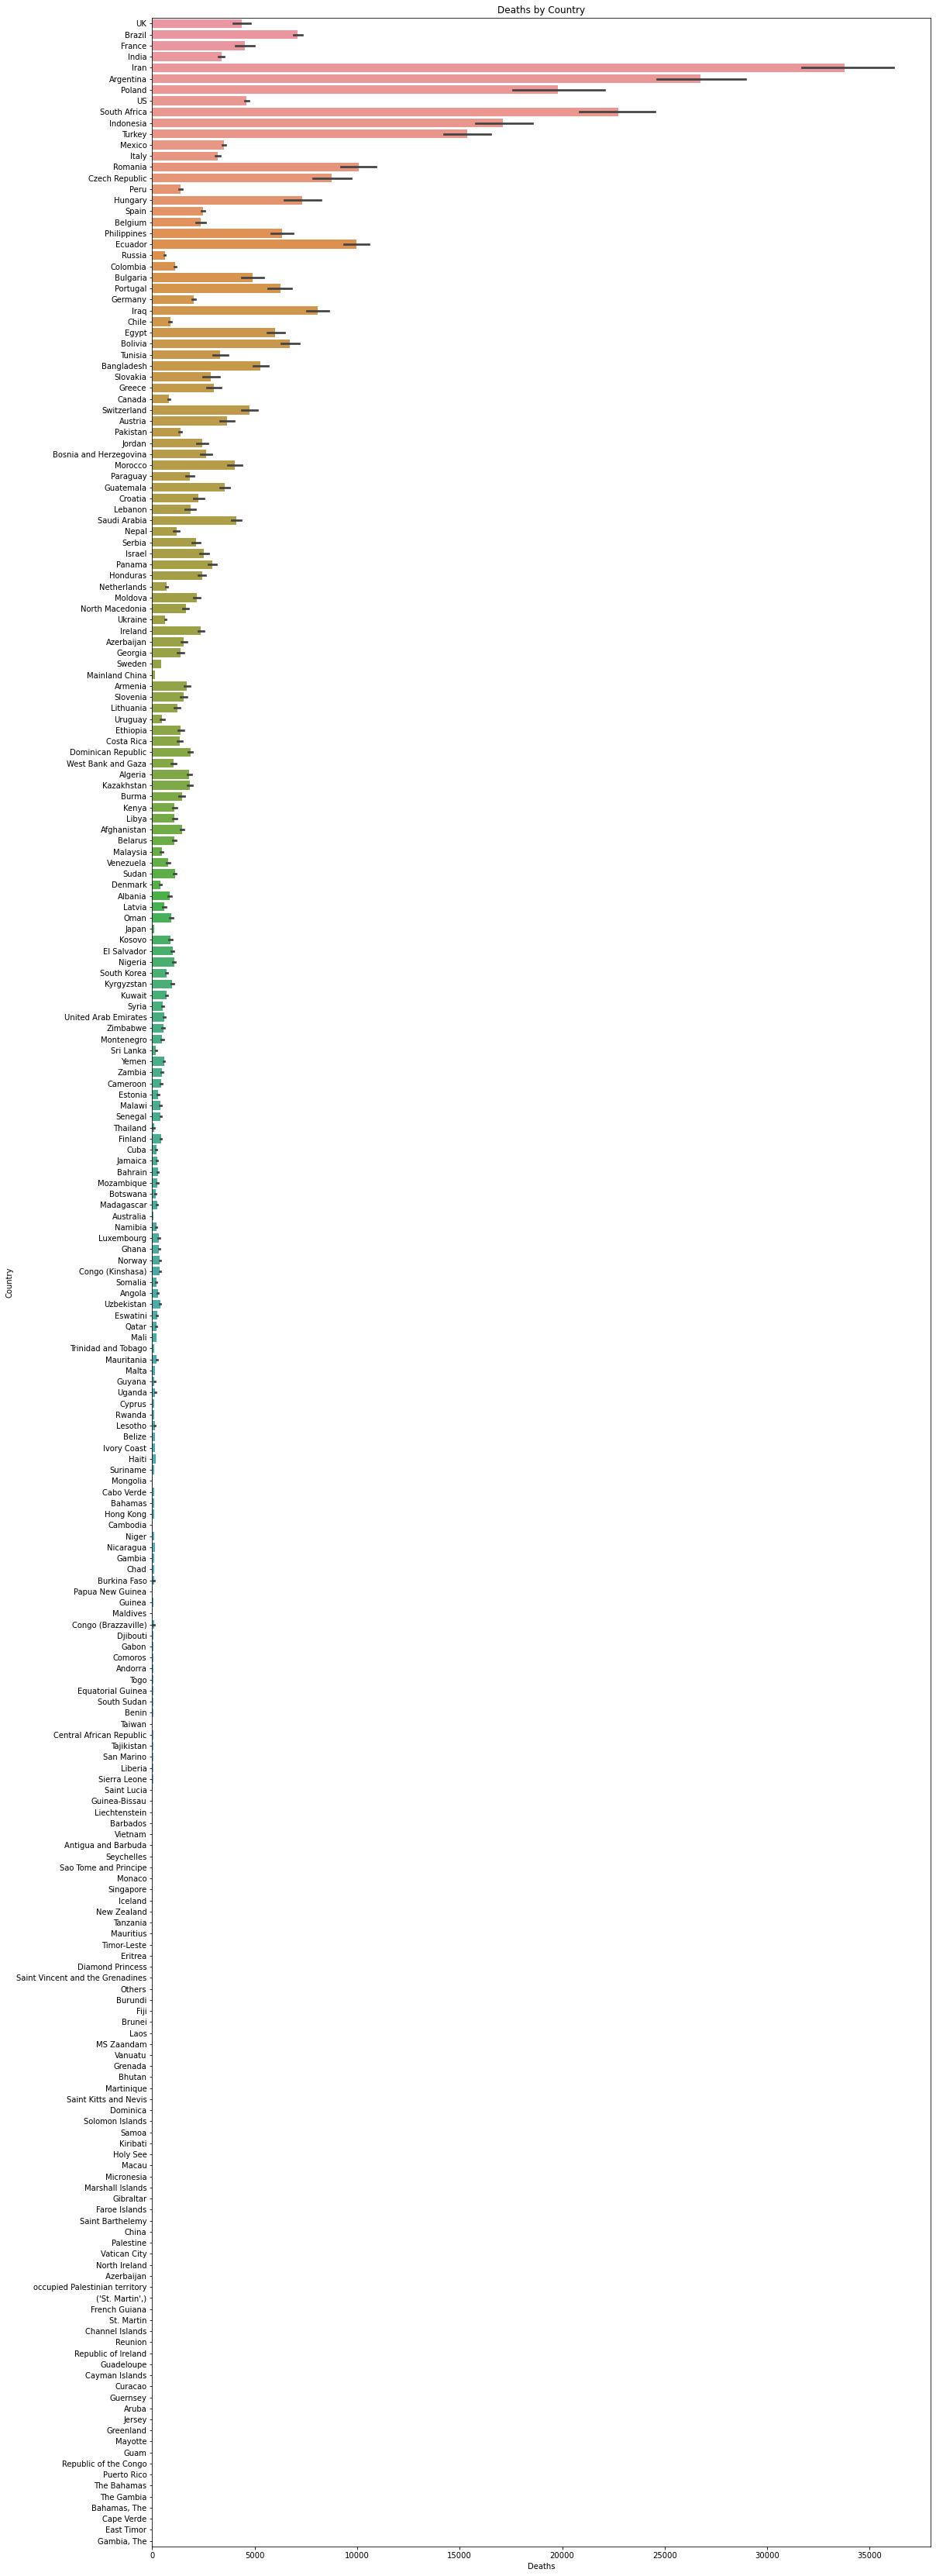

In [27]:
plt.figure(figsize=(18,60))
plt.title('Deaths by Country')
sns.barplot(data=df2, y='Country', x='Deaths')

<Figure size 1296x1296 with 0 Axes>

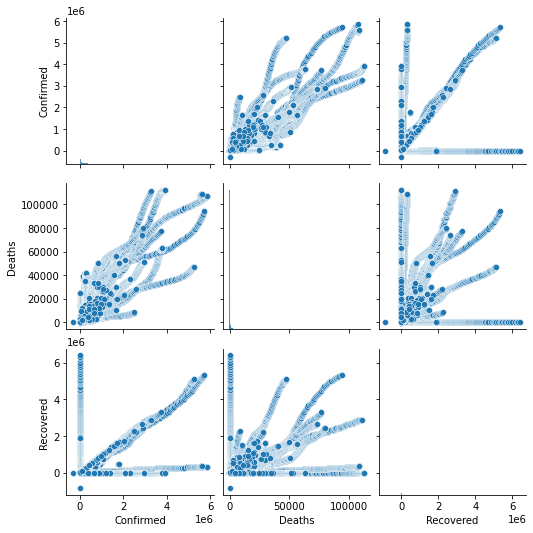

In [25]:
plt.figure(figsize=(18, 18))
sns.pairplot(data=data)

[]

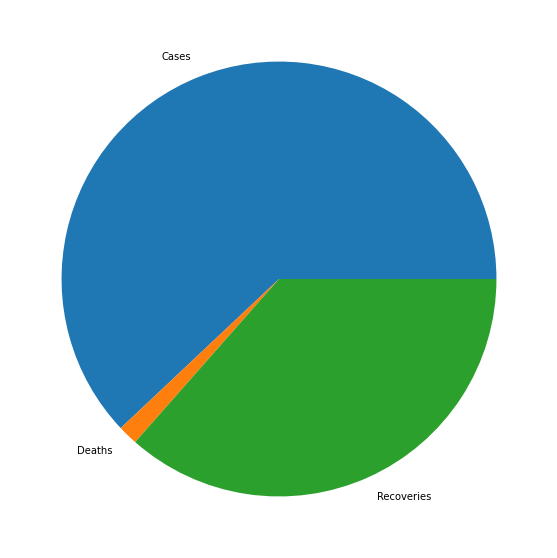

In [24]:
plt.figure(figsize=(10, 10))
cases = [26252051758, 624013017, 15450237912]
mylabels = ['Cases', 'Deaths', 'Recoveries']

plt.pie(cases, labels=mylabels)
plt.plot()